In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

import pickle

### Analyzing All Chain of Thought Conditions

In [2]:
cot0 = pd.read_csv('results/chain_of_thought0/23_fewshot_results.csv')
cot1 = pd.read_csv('results/chain_of_thought1/23_fewshot_results.csv')
cot2 = pd.read_csv('results/chain_of_thought2/23_fewshot_results.csv')
cot3 = pd.read_csv('results/chain_of_thought3/23_fewshot_results.csv')

all_cot_logistic = pd.DataFrame()

results = [cot0, cot1, cot2, cot3]
for i, cot in enumerate(results):
    print(f'Chain of Thought {i}')
    print(cot.columns)
    print( cot.problem.unique())
    print( cot.num_incontext.unique())
    print( cot.attempt.unique())

    # Check num_positive = num_negative on average across all problems
    display( cot.groupby(['num_incontext'])[['num_positive','num_negative']].mean())

    problem_by_num_incontext = cot.groupby(['problem','num_incontext'])[['accuracy','elapsed_time']].mean().reset_index()
    problem_by_num_incontext = problem_by_num_incontext.rename(columns = {'elapsed_time': 'mean_elapsed_time_over_10_attempts'})
    # display( problem_by_num_incontext)
    # problem_by_num_incontext.to_csv('temp.csv')

    # Relevant columns
    cols = ['problem','num_incontext','attempt','accuracy']
    cot_logistic = cot[cols]
    cot_logistic['source'] = f'Chain of Thought {i}'

    # Get first 10 attempts of each num_incontext and problem, if accidentally ran more than 10
    def max_10(group):
        return group.drop_duplicates(subset='attempt', keep='first')
    if i != 1:
        cot_logistic = cot_logistic.groupby(['problem','num_incontext']).apply(max_10).reset_index(drop = True)
    display(cot_logistic)

    # Append
    all_cot_logistic = pd.concat([all_cot_logistic, cot_logistic])

Chain of Thought 0
Index(['Unnamed: 0', 'condition', 'problem', 'num_incontext', 'attempt',
       'incontext_images', 'query_image', 'query_category', 'num_positive',
       'num_negative', 'convo', 'selected_category', 'accuracy',
       'raw_response', 'elapsed_time'],
      dtype='object')
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 10]


,num_positive,num_negative
num_incontext,,
1,0.513043,0.486957
2,1.034783,0.965217
3,1.556522,1.443478
4,1.991304,2.008696
5,2.513043,2.486957
6,3.034783,2.965217
7,3.282609,3.717391
8,4.030435,3.969565
9,4.586957,4.413043


/tmp/ipykernel_424312/2155470782.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cot_logistic['source'] = f'Chain of Thought {i}'


,problem,num_incontext,attempt,accuracy,source
0,1,1,1,1,Chain of Thought 0
1,1,1,2,1,Chain of Thought 0
2,1,1,3,1,Chain of Thought 0
3,1,1,4,0,Chain of Thought 0
4,1,1,5,0,Chain of Thought 0
...,...,...,...,...,...
2065,23,9,6,0,Chain of Thought 0
2066,23,9,7,1,Chain of Thought 0
2067,23,9,8,0,Chain of Thought 0
2068,23,9,9,0,Chain of Thought 0


Chain of Thought 1
Index(['Unnamed: 0', 'condition', 'problem', 'num_incontext', 'attempt',
       'incontext_images', 'query_image', 'query_category', 'num_positive',
       'num_negative', 'convo', 'selected_category', 'accuracy',
       'raw_response', 'elapsed_time'],
      dtype='object')
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 10]


,num_positive,num_negative
num_incontext,,
1,0.513043,0.486957
2,1.034783,0.965217
3,1.556522,1.443478
4,1.991304,2.008696
5,2.513043,2.486957
6,3.034783,2.965217
7,3.282609,3.717391
8,4.030435,3.969565
9,4.586957,4.413043


/tmp/ipykernel_424312/2155470782.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cot_logistic['source'] = f'Chain of Thought {i}'


,problem,num_incontext,attempt,accuracy,source
0,1,1,1,1,Chain of Thought 1
1,1,1,2,1,Chain of Thought 1
2,1,1,3,1,Chain of Thought 1
3,1,1,4,0,Chain of Thought 1
4,1,1,5,1,Chain of Thought 1
...,...,...,...,...,...
2065,23,9,6,1,Chain of Thought 1
2066,23,9,7,1,Chain of Thought 1
2067,23,9,8,1,Chain of Thought 1
2068,23,9,9,0,Chain of Thought 1


Chain of Thought 2
Index(['Unnamed: 0', 'condition', 'problem', 'num_incontext', 'attempt',
       'incontext_images', 'query_image', 'query_category', 'num_positive',
       'num_negative', 'convo', 'selected_category', 'accuracy',
       'raw_response', 'elapsed_time'],
      dtype='object')
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 10]


,num_positive,num_negative
num_incontext,,
1,0.513043,0.486957
2,1.034783,0.965217
3,1.556522,1.443478
4,1.991304,2.008696
5,2.513043,2.486957
6,3.034783,2.965217
7,3.282609,3.717391
8,4.030435,3.969565
9,4.586957,4.413043


/tmp/ipykernel_424312/2155470782.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cot_logistic['source'] = f'Chain of Thought {i}'


,problem,num_incontext,attempt,accuracy,source
0,1,1,1,1,Chain of Thought 2
1,1,1,2,1,Chain of Thought 2
2,1,1,3,1,Chain of Thought 2
3,1,1,4,0,Chain of Thought 2
4,1,1,5,0,Chain of Thought 2
...,...,...,...,...,...
2065,23,9,6,1,Chain of Thought 2
2066,23,9,7,1,Chain of Thought 2
2067,23,9,8,0,Chain of Thought 2
2068,23,9,9,0,Chain of Thought 2


Chain of Thought 3
Index(['Unnamed: 0', 'condition', 'problem', 'num_incontext', 'attempt',
       'incontext_images', 'query_image', 'query_category', 'num_positive',
       'num_negative', 'convo', 'selected_category', 'accuracy',
       'raw_response', 'elapsed_time'],
      dtype='object')
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 10]


,num_positive,num_negative
num_incontext,,
1,0.513043,0.486957
2,1.034783,0.965217
3,1.556522,1.443478
4,1.991304,2.008696
5,2.513043,2.486957
6,3.034783,2.965217
7,3.282609,3.717391
8,4.030435,3.969565
9,4.586957,4.413043


/tmp/ipykernel_424312/2155470782.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cot_logistic['source'] = f'Chain of Thought {i}'


,problem,num_incontext,attempt,accuracy,source
0,1,1,1,1,Chain of Thought 3
1,1,1,2,1,Chain of Thought 3
2,1,1,3,1,Chain of Thought 3
3,1,1,4,0,Chain of Thought 3
4,1,1,5,0,Chain of Thought 3
...,...,...,...,...,...
2065,23,9,6,1,Chain of Thought 3
2066,23,9,7,1,Chain of Thought 3
2067,23,9,8,0,Chain of Thought 3
2068,23,9,9,0,Chain of Thought 3


### Human data

In [3]:
import glob

# Grab filenames
fnames = sorted(glob.glob('../../humans/data_ours/*.csv'))
print('There are', len(fnames), 'participants in all of Exp 3')

def process(df):
    relevant_cols = [
        'Participant #', 
        'current_problem_num', 
        'accuracy', 
        'trials.thisTrialN',
        'expName'
    ]
    df = df[relevant_cols]

    # Create
    df['color'] = [expName.split('_')[0] for expName in df['expName']]
    df['display'] = [expName.split('_')[1] for expName in df['expName']]

    # Only get uncolored and sorted
    df = df[(df.color == 'uncolored') & (df.display == 'sorted')]

    # Rename for consistency
    df = df.rename(columns = {'Participant #': 'attempt', 'current_problem_num': 'problem', 'trials.thisTrialN': 'num_incontext'})

    # No nulls
    df = df[df['problem'].notnull()]

    df['num_incontext'] = df['num_incontext'] + 1

    # Make sure num_incontext is max 9
    df = df[df.num_incontext <= 9]

    # Drop cols
    df = df.drop(columns = ['color', 'display','expName'])

    # New column source
    df['source'] = 'Humans'

    return df

# Calculate dependent variable for each participant 
human_data = pd.DataFrame()
for fname in fnames:
    df = pd.read_csv(fname)
    human_data = pd.concat([human_data, process(df)], ignore_index=True)
display(human_data)
print('There are', len(human_data.attempt.unique()), 'participants in Sorted Uncolored condition')

There are 136 participants in all of Exp 3


/tmp/ipykernel_424312/1229621951.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color'] = [expName.split('_')[0] for expName in df['expName']]
/tmp/ipykernel_424312/1229621951.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['display'] = [expName.split('_')[1] for expName in df['expName']]
/tmp/ipykernel_424312/1229621951.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

,attempt,problem,accuracy,num_incontext,source
0,100,9.0,1.0,1.0,Humans
1,100,9.0,1.0,2.0,Humans
2,100,9.0,1.0,3.0,Humans
3,100,9.0,1.0,4.0,Humans
4,100,9.0,1.0,5.0,Humans
...,...,...,...,...,...
6718,96,20.0,1.0,5.0,Humans
6719,96,20.0,0.0,6.0,Humans
6720,96,20.0,0.0,7.0,Humans
6721,96,20.0,1.0,8.0,Humans


There are 34 participants in Sorted Uncolored condition


### Augment in-context 8 and 9 for humans and GPT (assume they are always correct)

In [6]:
def add(group):
    accuracy = 1
    
    total_incontext = 9
    start_num_incontext = len(group) + 1
    
    for num_incontext in range(start_num_incontext, total_incontext + 1):
        last_row = group.iloc[-1]  # Get the last row
        new_index = len(group)
        group.loc[new_index] = [
            last_row['attempt'],
            last_row['problem'],
            accuracy,
            num_incontext,
            'Humans'
        ]
    
    return group

print('Before assuming 8 and 9 are correct:', len(human_data))
human_data_augmented = human_data.groupby(['attempt', 'problem']).apply(add)
print('After assuming 8 and 9 are correct:', len(human_data_augmented))

Before assuming 8 and 9 are correct: 6723
After assuming 8 and 9 are correct: 7038


### Combine gpt-4-vision-preview with human data

In [7]:
all_logistic = pd.concat([
    all_cot_logistic, 
    human_data_augmented,
    # gpt_toc_augmented
])
all_logistic

,problem,num_incontext,attempt,accuracy,source
0,1.0,1.0,1,1.0,Chain of Thought 0
1,1.0,1.0,2,1.0,Chain of Thought 0
2,1.0,1.0,3,1.0,Chain of Thought 0
3,1.0,1.0,4,0.0,Chain of Thought 0
4,1.0,1.0,5,0.0,Chain of Thought 0
...,...,...,...,...,...
"(139, 23.0, 2245)",23.0,5.0,139,1.0,Humans
"(139, 23.0, 2246)",23.0,6.0,139,1.0,Humans
"(139, 23.0, 2247)",23.0,7.0,139,1.0,Humans
"(139, 23.0, 2248)",23.0,8.0,139,1.0,Humans


In [8]:
all_logistic.groupby(['num_incontext', 'source']).agg(
    mean_accuracy=('accuracy', 'mean'),
    count=('accuracy', 'size')
)

mean_accuracy  count
num_incontext source                                  
1.0           Chain of Thought 0       0.500000    230
              Chain of Thought 1       0.560870    230
              Chain of Thought 2       0.521739    230
              Chain of Thought 3       0.530435    230
              Humans                   0.530691    782
2.0           Chain of Thought 0       0.500000    230
              Chain of Thought 1       0.578261    230
              Chain of Thought 2       0.447826    230
              Chain of Thought 3       0.521739    230
              Humans                   0.640665    782
3.0           Chain of Thought 0       0.578261    230
              Chain of Thought 1       0.626087    230
              Chain of Thought 2       0.565217    230
              Chain of Thought 3       0.552174    230
              Humans                   0.709719    782
4.0           Chain of Thought 0       0.586957    230
              Chain of Thought 1       0.647826    230
              Chain of Thought 2       0.573913    230
              Chain of Thought 3       0.617391    230
              Humans                   0.745524    782
5.0           Chain of Thought 0       0.634783    230
              Chain of Thought 1       0.686957    230
              Chain of Thought 2       0.621739    230
              Chain of Thought 3       0.639130    230
              Humans                   0.764706    782
6.0           Chain of Thought 0       0.600000    230
              Chain of Thought 1       0.639130    230
              Chain of Thought 2       0.569565    230
              Chain of Thought 3       0.573913    230
              Humans                   0.776215    782
7.0           Chain of Thought 0       0.656522    230
              Chain of Thought 1       0.639130    230
              Chain of Thought 2       0.643478    230
              Chain of Thought 3       0.608696    230
              Humans                   0.791560    782
8.0           Chain of Thought 0       0.678261    230
              Chain of Thought 1       0.695652    230
              Chain of Thought 2       0.656522    230
              Chain of Thought 3       0.665217    230
              Humans                   0.819693    782
9.0           Chain of Thought 0       0.630435    230
              Chain of Thought 1       0.617391    230
              Chain of Thought 2       0.586957    230
              Chain of Thought 3       0.595652    230
              Humans                   0.831202    782

In [9]:
custom_order = [
    'Humans',
    'Chain of Thought 0',
    'Chain of Thought 1',
    'Chain of Thought 2',
    'Chain of Thought 3',
]
all_logistic['source'] = pd.Categorical(
    all_logistic['source'],
    categories=custom_order,
    ordered=True
)

/tmp/ipykernel_424312/760774071.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(['num_incontext', 'source']).agg(


Humans
Chain of Thought 0
Chain of Thought 1
Chain of Thought 2
Chain of Thought 3


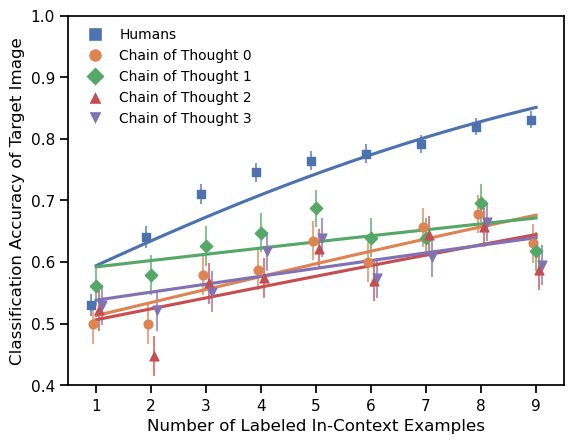

In [12]:
from statsmodels.stats.proportion import proportion_confint
from matplotlib.lines import Line2D

# Function to calculate mean accuracy and binomial confidence intervals
def summarize_data(df):
    summary = df.groupby(['num_incontext', 'source']).agg(
        mean_accuracy=('accuracy', 'mean'),
        count=('accuracy', 'size')
    ).reset_index()

    # # Calculate binomial confidence intervals
    # ci_lower, ci_upper = proportion_confint(count=summary['mean_accuracy'] * summary['count'], 
    #                                         nobs=summary['count'], alpha=0.05, method='wilson')

    # summary['ci_lower'] = summary['mean_accuracy'] - ci_lower
    # summary['ci_upper'] = ci_upper - summary['mean_accuracy']

    # Calculate standard error for binomial distribution
    summary['standard_error'] = np.sqrt(summary['mean_accuracy'] * (1 - summary['mean_accuracy']) / summary['count'])
    
    return summary

# Calculate summarized data
summary = summarize_data(all_logistic)

# Plotting
plt.figure(figsize = (6.4, 4.8))
sns.set_context('notebook')

# Unique sources and their properties
sources = summary['source'].unique()
num_sources = len(sources)
colors = sns.color_palette('deep')[:num_sources]
# markers = ['o']*(num_sources) # first is always human data
markers = ['s', 'o', 'D', '^', 'v']
offsets = np.linspace(-0.1, 0.1, num_sources)  # Offsets to separate error bars

# Custom legend handles
handles = []

for source, color, marker, offset in zip(sources, colors, markers, offsets):
    print(source)
    # Subset summary for the source
    subset = summary[summary['source'] == source]
    
    # Apply offset to num_incontext for plotting both points and error bars
    adjusted_x = subset['num_incontext'] + offset
    
    # Plot points with offset
    plt.scatter(adjusted_x, subset['mean_accuracy'], color=color, marker=marker, zorder=3, s=40)
    
    # Plot logistic regression without offset
    sns.regplot(
        x='num_incontext', 
        y='mean_accuracy', 
        data=subset, 
        logistic=True, 
        ci = None,
        scatter=False, 
        color=color, 
        line_kws={'zorder':2},
        label= f'{source}',
    ).set(
        # title = 'gpt-4o',
        # title = 'gpt-4o / High Image Detail',
        ylim = (0.4, 1),
        xticks = range(1,10)
    )
    
    # Plot error bars with the same offset and specified capsize
    plt.errorbar(adjusted_x, subset['mean_accuracy'], 
                 yerr=subset['standard_error'], 
                 fmt='none', ecolor=color, alpha=0.7, zorder=1, label='_no_legend_')
    
    # Create custom legend handle
    handles.append(Line2D([0], [0], marker=marker, color='w', label=source,
                          markerfacecolor=color, markersize=10))

plt.xlabel('Number of Labeled In-Context Examples')
plt.ylabel('Classification Accuracy of Target Image')
plt.legend(handles = handles, loc='upper left', fontsize='small').get_frame().set_linewidth(0.0)

# sns.despine()

plt.show()

## Only CoT 0 (comparing vision preview and 4o)

In [10]:
display(all_logistic.head())

,problem,num_incontext,attempt,accuracy,source
0,1.0,1.0,1,1.0,Chain of Thought 0
1,1.0,1.0,2,1.0,Chain of Thought 0
2,1.0,1.0,3,1.0,Chain of Thought 0
3,1.0,1.0,4,0.0,Chain of Thought 0
4,1.0,1.0,5,0.0,Chain of Thought 0


Humans
Chain of Thought 0
Chain of Thought 1
Chain of Thought 2
Chain of Thought 3


/tmp/ipykernel_424312/760774071.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(['num_incontext', 'source']).agg(


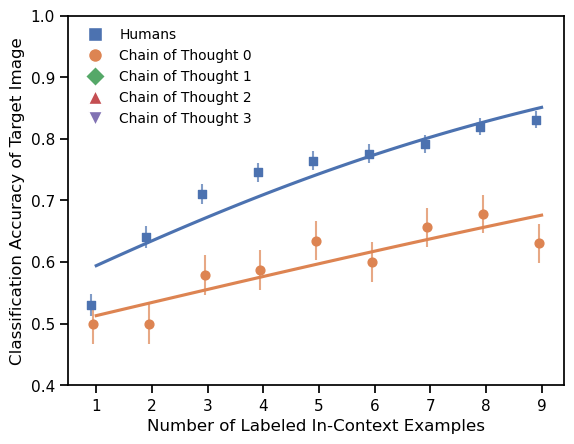

In [16]:
# Get only CoT 0
all_logistic_cot0 = all_logistic[(all_logistic.source == 'Chain of Thought 0') | (all_logistic.source == 'Humans')]

# Calculate summarized data
summary = summarize_data(all_logistic_cot0)

# Plotting
plt.figure(figsize = (6.4, 4.8))
sns.set_context('notebook')

# Unique sources and their properties
sources = summary['source'].unique()
num_sources = len(sources)
colors = sns.color_palette('deep')[:num_sources]
# markers = ['o']*(num_sources) # first is always human data
markers = ['s', 'o', 'D', '^', 'v']
offsets = np.linspace(-0.1, 0.1, num_sources)  # Offsets to separate error bars

# Custom legend handles
handles = []

for source, color, marker, offset in zip(sources, colors, markers, offsets):
    print(source)
    # Subset summary for the source
    subset = summary[summary['source'] == source]
    
    # Apply offset to num_incontext for plotting both points and error bars
    adjusted_x = subset['num_incontext'] + offset
    
    # Plot points with offset
    plt.scatter(adjusted_x, subset['mean_accuracy'], color=color, marker=marker, zorder=3, s=40)
    
    # Plot logistic regression without offset
    sns.regplot(
        x='num_incontext', 
        y='mean_accuracy', 
        data=subset, 
        logistic=True, 
        ci = None,
        scatter=False, 
        color=color, 
        line_kws={'zorder':2},
        label= f'{source}',
    ).set(
        # title = 'gpt-4o',
        # title = 'gpt-4o / High Image Detail',
        ylim = (0.4, 1),
        xticks = range(1,10)
    )
    
    # Plot error bars with the same offset and specified capsize
    plt.errorbar(adjusted_x, subset['mean_accuracy'], 
                 yerr=subset['standard_error'], 
                 fmt='none', ecolor=color, alpha=0.7, zorder=1, label='_no_legend_')
    
    # Create custom legend handle
    handles.append(Line2D([0], [0], marker=marker, color='w', label=source,
                          markerfacecolor=color, markersize=10))

plt.xlabel('Number of Labeled In-Context Examples')
plt.ylabel('Classification Accuracy of Target Image')
plt.legend(handles = handles, loc='upper left', fontsize='small').get_frame().set_linewidth(0.0)

# sns.despine()

plt.show()